Dataset : KC1
Feaatures = 22
Model : GAN
Balancing technique : Generate Values


In [ ]:
import pandas as pd
import tensorflow as tf

from scipy.io import arff
data = arff.loadarff('MC2.arff')
df= pd.DataFrame(data[0])
df.head()


,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PATHOLOGICAL_COMPLEXITY,PERCENT_COMMENTS,LOC_TOTAL,Defective
0,2.0,3.0,0.0,2.0,7.0,4.0,2.0,0.18,2.0,2.0,...,0.09,11.0,15.0,6.0,8.0,22.0,1.0,50.00,11.0,b'N'
1,1.0,3.0,1.0,1.0,0.0,4.0,2.0,0.13,2.0,2.0,...,0.11,12.0,19.0,8.0,10.0,18.0,1.0,6.67,15.0,b'N'
2,6.0,5.0,1.0,4.0,5.0,8.0,3.0,0.20,4.0,2.0,...,0.10,25.0,38.0,12.0,11.0,29.0,1.0,45.00,15.0,b'N'
3,6.0,5.0,1.0,4.0,3.0,8.0,3.0,0.20,4.0,2.0,...,0.12,26.0,38.0,10.0,11.0,26.0,1.0,38.89,15.0,b'N'
4,2.0,3.0,0.0,0.0,1.0,4.0,2.0,0.29,2.0,2.0,...,0.17,7.0,13.0,5.0,9.0,12.0,1.0,12.50,7.0,b'N'


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df.Defective = label_encoder.fit_transform(df.Defective)

In [ ]:
df.describe()

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PATHOLOGICAL_COMPLEXITY,PERCENT_COMMENTS,LOC_TOTAL,Defective
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,127.000000,...,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.0,161.000000,161.000000,161.000000
mean,9.434783,13.322981,1.894410,1.950311,11.857143,21.391304,7.422360,0.263975,9.739130,2.105827,...,0.157453,74.894410,101.788820,21.770186,13.813665,61.751553,1.0,22.694161,38.099379,0.322981
std,14.833148,20.163582,3.003337,4.101526,19.526539,34.826745,10.379451,0.183440,15.136265,0.203456,...,0.111222,106.380191,144.724281,24.526070,7.268257,83.191273,0.0,18.702932,55.282932,0.469075
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.040000,0.000000,2.000000,...,0.020000,0.000000,1.000000,0.000000,1.000000,3.000000,1.0,0.000000,1.000000,0.000000
25%,1.000000,3.000000,0.000000,0.000000,0.000000,4.000000,2.000000,0.150000,2.000000,2.000000,...,0.090000,14.000000,18.000000,7.000000,7.000000,14.000000,1.0,4.760000,7.000000,0.000000
50%,5.000000,7.000000,1.000000,0.000000,4.000000,8.000000,4.000000,0.220000,4.000000,2.000000,...,0.130000,36.000000,55.000000,13.000000,13.000000,31.000000,1.0,23.080000,19.000000,0.000000
75%,10.000000,15.000000,3.000000,2.000000,14.000000,24.000000,8.000000,0.300000,12.000000,2.155000,...,0.190000,81.000000,119.000000,28.000000,19.000000,69.000000,1.0,33.330000,43.000000,1.000000
max,105.000000,125.000000,18.000000,19.000000,123.000000,216.000000,63.000000,1.000000,102.000000,3.000000,...,0.670000,632.000000,864.000000,203.000000,37.000000,474.000000,1.0,82.980000,365.000000,1.000000


In [ ]:
df.shape

(161, 41)

In [ ]:
df.corr().Defective

LOC_BLANK                          0.323727
BRANCH_COUNT                       0.329214
CALL_PAIRS                         0.237308
LOC_CODE_AND_COMMENT               0.170822
LOC_COMMENTS                       0.345566
CONDITION_COUNT                    0.336540
CYCLOMATIC_COMPLEXITY              0.320973
CYCLOMATIC_DENSITY                -0.095638
DECISION_COUNT                     0.341165
DECISION_DENSITY                   0.140742
DESIGN_COMPLEXITY                  0.303292
DESIGN_DENSITY                    -0.135733
EDGE_COUNT                         0.347387
ESSENTIAL_COMPLEXITY               0.321591
ESSENTIAL_DENSITY                  0.294592
LOC_EXECUTABLE                     0.247727
PARAMETER_COUNT                    0.165994
GLOBAL_DATA_COMPLEXITY             0.289614
GLOBAL_DATA_DENSITY               -0.017347
HALSTEAD_CONTENT                   0.087871
HALSTEAD_DIFFICULTY                0.378222
HALSTEAD_EFFORT                    0.288067
HALSTEAD_ERROR_EST              

In [ ]:
# Assuming df is your DataFrame
correlation_matrix = df.corr()

# Selecting the correlation values for 'Defective' column
correlation_with_defective = correlation_matrix['Defective']

# Taking absolute values of the correlations
correlation_with_defective_abs = correlation_with_defective.abs()

# Sorting the absolute correlation values in descending order and excluding 'Defective' column
sorted_correlation_abs = correlation_with_defective_abs.drop('Defective').sort_values(ascending=False)

# Selecting the top 6 correlated columns
top_6_correlated_columns_abs = sorted_correlation_abs.head(6)

print(top_6_correlated_columns_abs)


HALSTEAD_DIFFICULTY     0.378222
NODE_COUNT              0.352194
EDGE_COUNT              0.347387
LOC_COMMENTS            0.345566
DECISION_COUNT          0.341165
NUM_UNIQUE_OPERATORS    0.340404
Name: Defective, dtype: float64


In [ ]:
# Extracting only the column names
cols = top_6_correlated_columns_abs.index.tolist()

print(cols)


['HALSTEAD_DIFFICULTY', 'NODE_COUNT', 'EDGE_COUNT', 'LOC_COMMENTS', 'DECISION_COUNT', 'NUM_UNIQUE_OPERATORS']


In [ ]:
df.Defective.value_counts()

0    109
1     52
Name: Defective, dtype: int64

In [ ]:
df_t = df[df["Defective"] == 1]

In [ ]:
dim = df_t.shape[1]

In [ ]:
df_t.shape

(52, 41)

In [ ]:
df_t = df_t[cols]

In [ ]:
cols

['HALSTEAD_DIFFICULTY',
 'NODE_COUNT',
 'EDGE_COUNT',
 'LOC_COMMENTS',
 'DECISION_COUNT',
 'NUM_UNIQUE_OPERATORS']

In [ ]:
df_t

,HALSTEAD_DIFFICULTY,NODE_COUNT,EDGE_COUNT,LOC_COMMENTS,DECISION_COUNT,NUM_UNIQUE_OPERATORS
5,57.74,55.0,79.0,24.0,26.0,32.0
10,8.17,2.0,1.0,0.0,0.0,7.0
11,14.00,2.0,1.0,14.0,0.0,7.0
12,6.42,2.0,1.0,0.0,0.0,7.0
26,6.67,8.0,9.0,7.0,4.0,8.0
27,8.17,12.0,13.0,4.0,4.0,7.0
28,21.00,12.0,14.0,2.0,6.0,14.0
29,40.24,24.0,28.0,33.0,10.0,18.0
30,88.78,109.0,127.0,61.0,32.0,27.0
31,78.12,76.0,97.0,44.0,42.0,21.0


Streaming output truncated to the last 5000 lines.
4/4 [==============================] - 0s 4ms/step
Epoch 501/3000 [D loss: 0.707772396504879, G loss: 0.38081246614456177]
4/4 [==============================] - 0s 3ms/step
Epoch 502/3000 [D loss: 0.6754776388406754, G loss: 0.3810383677482605]
4/4 [==============================] - 0s 3ms/step
Epoch 503/3000 [D loss: 0.7026839405298233, G loss: 0.3830723166465759]
4/4 [==============================] - 0s 4ms/step
Epoch 504/3000 [D loss: 0.6964487135410309, G loss: 0.3808562159538269]
4/4 [==============================] - 0s 3ms/step
Epoch 505/3000 [D loss: 0.6993328332901001, G loss: 0.38471585512161255]
4/4 [==============================] - 0s 4ms/step
Epoch 506/3000 [D loss: 0.691598042845726, G loss: 0.3909091353416443]
4/4 [==============================] - 0s 2ms/step
Epoch 507/3000 [D loss: 0.7031020224094391, G loss: 0.3912668824195862]
4/4 [==============================] - 0s 4ms/step
Epoch 508/3000 [D loss: 0.68339474499

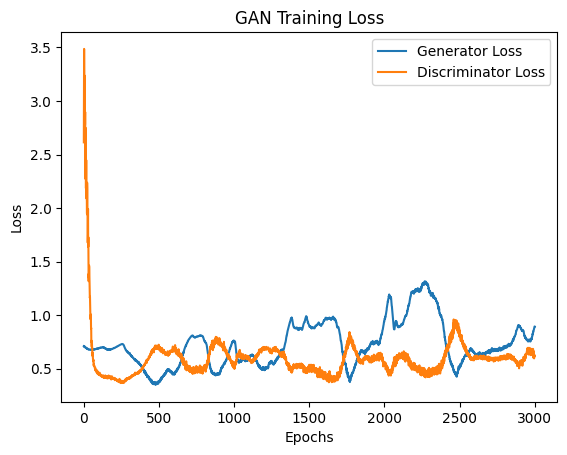

In [ ]:
import numpy as np
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from keras import backend as K
import matplotlib.pyplot as plt

gen = None

# Custom loss function
def custom_loss(y_true, y_pred):
    return K.mean(K.round(K.maximum(y_pred, 1.0)) - y_true)

# Define generator model
def build_generator(dim):
    model = Sequential()
    model.add(Dense(128, input_dim=dim, activation='relu'))
    model.add(Dense(128, activation="relu"))
    model.add(Dense(6, activation='relu'))
    return model

# Define discriminator model
def build_discriminator(dim):
    model = Sequential()
    model.add(Dense(128, input_dim=dim, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Build GAN model
def build_gan(generator, discriminator, gen_optimizer, disc_optimizer):
    discriminator.trainable = False
    gan_input = generator.input
    gan_output = discriminator(generator.output)
    gan = Model(gan_input, gan_output)
    gan.compile(optimizer=gen_optimizer, loss='binary_crossentropy')
    discriminator.trainable = True
    discriminator.compile(optimizer=disc_optimizer, loss='binary_crossentropy')
    return gan

# Train GAN function
# Train GAN function
def train_gan(generator, discriminator, gan, X_train, epochs=3000, batch_size=128):
    g_losses = []
    d_losses = []
    lowest_accuracy = float('inf')  # Initialize with infinity
    best_gan = None  # Initialize with None
    for epoch in range(epochs):
        # Generate fake data
        noise = np.random.normal(0, 1, size=(batch_size, generator.input_shape[1]))
        fake_data = generator.predict(noise)


        # Select a random batch of real data
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        real_data = X_train[idx]

        # Labels for fake and real data
        fake_labels = np.zeros((batch_size, 1))
        real_labels = np.ones((batch_size, 1))

        # Train discriminator
        d_loss_fake = discriminator.train_on_batch(fake_data, fake_labels)
        d_loss_real = discriminator.train_on_batch(real_data, real_labels)

        # Compute discriminator loss
        d_loss = 0.5 * np.add(d_loss_fake, d_loss_real)

        # Generate noise for generator input
        noise = np.random.normal(0, 1, size=(batch_size, generator.input_shape[1]))

        # Train generator using custom loss
        g_loss = gan.train_on_batch(noise, real_labels)

        # Append losses
        g_losses.append(g_loss)
        d_losses.append(d_loss)

        # Check if current accuracy is the lowest
        current_accuracy = min(d_loss_fake, d_loss_real)
        if current_accuracy < lowest_accuracy:
            lowest_accuracy = current_accuracy
            # Save the GAN model
            best_gan = generator

        # Print progress
        print(f"Epoch {epoch+1}/{epochs} [D loss: {d_loss}, G loss: {g_loss}]")

    # Plot losses
    plt.plot(range(1, epochs+1), g_losses, label='Generator Loss')
    plt.plot(range(1, epochs+1), d_losses, label='Discriminator Loss')
    plt.title('GAN Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    return best_gan

# Assuming df is your data
X_train = df_t.values

# Build generator and discriminator models
generator = build_generator(6)
discriminator = build_discriminator(6)

# Define optimizers with different learning rates
gen_optimizer = Adam(learning_rate=0.0001, beta_1=0.5)
disc_optimizer = Adam(learning_rate=0.00005, beta_1=0.5)

# Build GAN model
gan = build_gan(generator, discriminator, gen_optimizer, disc_optimizer)

# Train GAN model and get the one with lowest accuracy
best_gan_model = train_gan(generator, discriminator, gan, X_train)




In [ ]:
import pandas as pd

# Check if the best GAN model is available
if best_gan_model is not None:
    num_outputs = 57  # Change this to the desired number of outputs

    # Generate noise
    noise = np.random.normal(0, 1, size=(num_outputs, 6))

    # Generate data using the GAN model
    generated_data = best_gan_model.predict(noise)

    # Print the shape of the generated data
    print("Shape of generated data:", generated_data.shape)

    # Convert generated data into a DataFrame
    generated_df = pd.DataFrame(generated_data, columns=cols)

    # Display the generated data as a table
    print(generated_df)
else:
    print("No best GAN model found.")


2/2 [==============================] - 0s 5ms/step
Shape of generated data: (57, 6)
    HALSTEAD_DIFFICULTY  NODE_COUNT  EDGE_COUNT  LOC_COMMENTS  DECISION_COUNT  \
0             39.546894   24.148008   33.026295     27.237511        6.159026   
1             33.935108   21.526896   29.342957     23.755009        5.755570   
2             50.919445   32.372223   44.184498     36.535515        8.121034   
3             26.419128   17.048429   23.432016     19.211777        4.347492   
4             49.372486   31.357086   43.605984     35.465542        7.827823   
5             44.342747   27.058039   37.438564     30.579651        6.685194   
6             26.715149   15.987743   22.484045     18.201473        3.944112   
7             24.255270   15.051977   20.804581     17.028307        3.714143   
8             33.469856   21.472294   29.227377     23.780361        5.382941   
9             32.026257   20.876692   28.523809     23.514133        5.431083   
10            43.185299  

In [ ]:
cols.append("Defective")

In [ ]:
cols

['HALSTEAD_DIFFICULTY',
 'NODE_COUNT',
 'EDGE_COUNT',
 'LOC_COMMENTS',
 'DECISION_COUNT',
 'NUM_UNIQUE_OPERATORS',
 'Defective']

In [ ]:
df = df[cols]

In [ ]:
df

,HALSTEAD_DIFFICULTY,NODE_COUNT,EDGE_COUNT,LOC_COMMENTS,DECISION_COUNT,NUM_UNIQUE_OPERATORS,Defective
0,7.33,6.0,6.0,7.0,2.0,8.0,0
1,7.50,7.0,7.0,0.0,2.0,10.0,0
2,11.46,10.0,11.0,5.0,4.0,11.0,0
3,14.30,10.0,11.0,3.0,4.0,11.0,0
4,6.30,6.0,6.0,1.0,2.0,9.0,0
...,...,...,...,...,...,...,...
156,12.83,10.0,10.0,3.0,2.0,12.0,0
157,27.35,33.0,39.0,27.0,14.0,20.0,0
158,7.00,2.0,1.0,38.0,0.0,7.0,0
159,2.67,2.0,1.0,0.0,0.0,4.0,0


In [ ]:
df.Defective.value_counts()

0    109
1     52
Name: Defective, dtype: int64

In [ ]:
generated_df["Defective"] = 1

In [ ]:
generated_df.describe()

,HALSTEAD_DIFFICULTY,NODE_COUNT,EDGE_COUNT,LOC_COMMENTS,DECISION_COUNT,NUM_UNIQUE_OPERATORS,Defective
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.0
mean,36.442986,23.067310,31.710451,25.834106,5.869709,20.144892,1.0
std,7.411476,4.855688,6.619251,5.375746,1.252707,3.958122,0.0
min,22.478111,14.574146,20.168449,16.293926,3.714143,12.254081,1.0
25%,32.026257,20.507078,28.047016,22.988205,5.135691,17.901775,1.0
50%,36.018051,22.246811,30.723166,24.584984,5.687190,19.750845,1.0
75%,41.010899,26.432806,36.132923,29.517612,6.683352,22.366371,1.0
max,50.919445,32.782784,45.348553,36.535515,8.477704,27.877653,1.0


<Axes: >

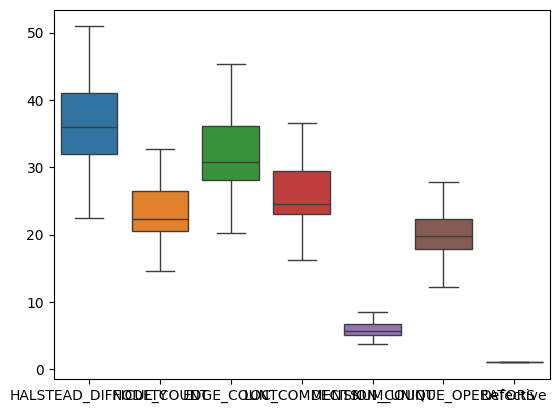

In [ ]:
import seaborn as sns

# Assuming 'generated_df' is your DataFrame
sns.boxplot(data=generated_df)

In [ ]:
df.describe()

,HALSTEAD_DIFFICULTY,NODE_COUNT,EDGE_COUNT,LOC_COMMENTS,DECISION_COUNT,NUM_UNIQUE_OPERATORS,Defective
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,23.184845,23.006211,28.428571,11.857143,9.739130,13.813665,0.322981
std,23.564841,30.934103,40.952368,19.526539,15.136265,7.268257,0.469075
min,0.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.560000,6.000000,6.000000,0.000000,2.000000,7.000000,0.000000
50%,14.620000,12.000000,14.000000,4.000000,4.000000,13.000000,0.000000
75%,28.270000,28.000000,32.000000,14.000000,12.000000,19.000000,1.000000
max,125.670000,191.000000,247.000000,123.000000,102.000000,37.000000,1.000000


<Axes: >

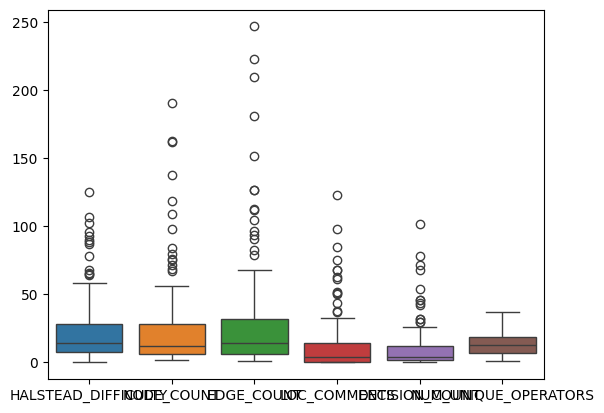

In [ ]:
import seaborn as sns

# Assuming 'generated_df' is your DataFrame
sns.boxplot(data=df[cols])

In [ ]:
df_gan = pd.concat([df,generated_df])

In [ ]:
df_gan.Defective.value_counts()

0    109
1    109
Name: Defective, dtype: int64

<Axes: >

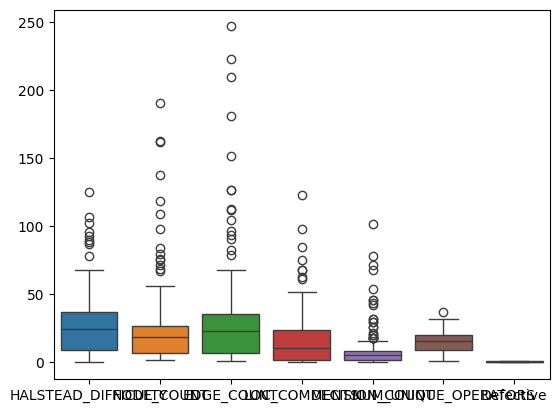

In [ ]:
import seaborn as sns

# Assuming 'generated_df' is your DataFrame
sns.boxplot(data=df_gan)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming 'Defective' is the target column and the rest are features
X = df_gan.drop('Defective', axis=1)
y = df_gan['Defective']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Train Logistic Regression classifier
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train, y_train)

# Predictions
rf_predictions = rf_classifier.predict(X_test)
lr_predictions = lr_classifier.predict(X_test)

# Calculate accuracy scores
rf_accuracy = accuracy_score(y_test, rf_predictions)
lr_accuracy = accuracy_score(y_test, lr_predictions)

print("Random Forest Accuracy:", rf_accuracy)
print("Logistic Regression Accuracy:", lr_accuracy)


Random Forest Accuracy: 0.8409090909090909
Logistic Regression Accuracy: 0.7954545454545454


In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Train Support Vector Machine (SVM) classifier
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

# Train Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)

# Train k-Nearest Neighbors (kNN) classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

# Train Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Train Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Predictions
svm_predictions = svm_classifier.predict(X_test)
gb_predictions = gb_classifier.predict(X_test)
knn_predictions = knn_classifier.predict(X_test)
dt_predictions = dt_classifier.predict(X_test)
nb_predictions = nb_classifier.predict(X_test)

# Calculate accuracy scores
svm_accuracy = accuracy_score(y_test, svm_predictions)
gb_accuracy = accuracy_score(y_test, gb_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)
nb_accuracy = accuracy_score(y_test, nb_predictions)

print("Support Vector Machine (SVM) Accuracy:", svm_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("k-Nearest Neighbors (kNN) Accuracy:", knn_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("Naive Bayes Accuracy:", nb_accuracy)


Support Vector Machine (SVM) Accuracy: 0.7954545454545454
Gradient Boosting Accuracy: 0.75
k-Nearest Neighbors (kNN) Accuracy: 0.8409090909090909
Decision Tree Accuracy: 0.8181818181818182
Naive Bayes Accuracy: 0.6818181818181818


In [ ]:
import numpy as np
from imblearn.over_sampling import SMOTE

In [ ]:
from scipy.io import arff
data = arff.loadarff('MC2.arff')
df= pd.DataFrame(data[0])
df.head()

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PATHOLOGICAL_COMPLEXITY,PERCENT_COMMENTS,LOC_TOTAL,Defective
0,2.0,3.0,0.0,2.0,7.0,4.0,2.0,0.18,2.0,2.0,...,0.09,11.0,15.0,6.0,8.0,22.0,1.0,50.00,11.0,b'N'
1,1.0,3.0,1.0,1.0,0.0,4.0,2.0,0.13,2.0,2.0,...,0.11,12.0,19.0,8.0,10.0,18.0,1.0,6.67,15.0,b'N'
2,6.0,5.0,1.0,4.0,5.0,8.0,3.0,0.20,4.0,2.0,...,0.10,25.0,38.0,12.0,11.0,29.0,1.0,45.00,15.0,b'N'
3,6.0,5.0,1.0,4.0,3.0,8.0,3.0,0.20,4.0,2.0,...,0.12,26.0,38.0,10.0,11.0,26.0,1.0,38.89,15.0,b'N'
4,2.0,3.0,0.0,0.0,1.0,4.0,2.0,0.29,2.0,2.0,...,0.17,7.0,13.0,5.0,9.0,12.0,1.0,12.50,7.0,b'N'


In [ ]:
# Assuming df is your DataFrame
correlation_matrix = df.corr()

# Selecting the correlation values for 'Defective' column
correlation_with_defective = correlation_matrix['Defective']

# Taking absolute values of the correlations
correlation_with_defective_abs = correlation_with_defective.abs()

# Sorting the absolute correlation values in descending order and excluding 'Defective' column
sorted_correlation_abs = correlation_with_defective_abs.drop('Defective').sort_values(ascending=False)

# Selecting the top 6 correlated columns
top_6_correlated_columns_abs = sorted_correlation_abs.head(6)

print(top_6_correlated_columns_abs)

cols = top_6_correlated_columns_abs.index.tolist()

print(cols)


HALSTEAD_DIFFICULTY     0.378222
NODE_COUNT              0.352194
EDGE_COUNT              0.347387
LOC_COMMENTS            0.345566
DECISION_COUNT          0.341165
NUM_UNIQUE_OPERATORS    0.340404
Name: Defective, dtype: float64
['HALSTEAD_DIFFICULTY', 'NODE_COUNT', 'EDGE_COUNT', 'LOC_COMMENTS', 'DECISION_COUNT', 'NUM_UNIQUE_OPERATORS']


In [ ]:
cols

['HALSTEAD_DIFFICULTY', 'NODE_COUNT', 'EDGE_COUNT', 'LOC_COMMENTS']

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df.Defective = label_encoder.fit_transform(df.Defective)

In [ ]:
X_train = df[cols]
y_train = df["Defective"]

In [ ]:
X_train

,HALSTEAD_DIFFICULTY,NODE_COUNT,EDGE_COUNT,LOC_COMMENTS,DECISION_COUNT,NUM_UNIQUE_OPERATORS
0,7.33,6.0,6.0,7.0,2.0,8.0
1,7.50,7.0,7.0,0.0,2.0,10.0
2,11.46,10.0,11.0,5.0,4.0,11.0
3,14.30,10.0,11.0,3.0,4.0,11.0
4,6.30,6.0,6.0,1.0,2.0,9.0
...,...,...,...,...,...,...
156,12.83,10.0,10.0,3.0,2.0,12.0
157,27.35,33.0,39.0,27.0,14.0,20.0
158,7.00,2.0,1.0,38.0,0.0,7.0
159,2.67,2.0,1.0,0.0,0.0,4.0


In [ ]:
y_train

0      0
1      0
2      0
3      0
4      0
      ..
156    0
157    0
158    0
159    0
160    0
Name: Defective, Length: 161, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB



smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Convert the resampled data into a DataFrame
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=cols)
y_train_resampled_df = pd.DataFrame(y_train_resampled, columns=['Defective'])

# Concatenate features and target into one DataFrame
resampled_df = pd.concat([X_train_resampled_df, y_train_resampled_df], axis=1)

df_smote = resampled_df

# Assuming df_smote is your resampled DataFrame
# Assuming "Defective" is the target column and the rest are features
X = df_smote.drop("Defective", axis=1)
y = df_smote["Defective"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Train Logistic Regression classifier
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_classifier.predict(X_test)
lr_predictions = lr_classifier.predict(X_test)

# Calculate accuracy scores
rf_accuracy = accuracy_score(y_test, rf_predictions)
lr_accuracy = accuracy_score(y_test, lr_predictions)

print("Random Forest Accuracy:", rf_accuracy)
print("Logistic Regression Accuracy:", lr_accuracy)

svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

# Train Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)

# Train k-Nearest Neighbors (kNN) classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

# Train Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Train Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Make predictions
svm_predictions = svm_classifier.predict(X_test)
gb_predictions = gb_classifier.predict(X_test)
knn_predictions = knn_classifier.predict(X_test)
dt_predictions = dt_classifier.predict(X_test)
nb_predictions = nb_classifier.predict(X_test)

# Calculate accuracy scores
svm_accuracy = accuracy_score(y_test, svm_predictions)
gb_accuracy = accuracy_score(y_test, gb_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)
nb_accuracy = accuracy_score(y_test, nb_predictions)

print("Support Vector Machine (SVM) Accuracy:", svm_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("k-Nearest Neighbors (kNN) Accuracy:", knn_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("Naive Bayes Accuracy:", nb_accuracy)


Random Forest Accuracy: 0.6818181818181818
Logistic Regression Accuracy: 0.5454545454545454
Support Vector Machine (SVM) Accuracy: 0.5909090909090909
Gradient Boosting Accuracy: 0.6818181818181818
k-Nearest Neighbors (kNN) Accuracy: 0.7272727272727273
Decision Tree Accuracy: 0.7272727272727273
Naive Bayes Accuracy: 0.5454545454545454


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE


# Assuming X_train and y_train are your original training data
# Assuming cols is a list containing column names for your features

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply SMOTE
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Convert the resampled data into a DataFrame
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=cols)
y_train_resampled_df = pd.DataFrame(y_train_resampled, columns=['Defective'])

# Concatenate features and target into one DataFrame
resampled_df = pd.concat([X_train_resampled_df, y_train_resampled_df], axis=1)

# Display the resampled DataFrame
print(resampled_df)


     HALSTEAD_DIFFICULTY  NODE_COUNT  EDGE_COUNT  LOC_COMMENTS  \
0               0.058327    0.021164    0.020325      0.056911   
1               0.059680    0.026455    0.024390      0.000000   
2               0.091191    0.042328    0.040650      0.040650   
3               0.113790    0.042328    0.040650      0.024390   
4               0.050131    0.021164    0.020325      0.008130   
..                   ...         ...         ...           ...   
213             0.071354    0.015330    0.013602      0.008965   
214             0.276774    0.106410    0.099520      0.355297   
215             0.069778    0.026179    0.025309      0.009049   
216             0.107643    0.002047    0.002097      0.110152   
217             0.110032    0.000124    0.000096      0.111720   

     DECISION_COUNT  NUM_UNIQUE_OPERATORS  Defective  
0          0.019608              0.194444          0  
1          0.019608              0.250000          0  
2          0.039216              0.277778 

In [ ]:
df_smote = resampled_df

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Assuming df_smote is your resampled DataFrame
# Assuming "Defective" is the target column and the rest are features
X = df_smote.drop("Defective", axis=1)
y = df_smote["Defective"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Train Logistic Regression classifier
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_classifier.predict(X_test)
lr_predictions = lr_classifier.predict(X_test)

# Calculate accuracy scores
rf_accuracy = accuracy_score(y_test, rf_predictions)
lr_accuracy = accuracy_score(y_test, lr_predictions)

print("Random Forest Accuracy:", rf_accuracy)
print("Logistic Regression Accuracy:", lr_accuracy)


Random Forest Accuracy: 0.7727272727272727
Logistic Regression Accuracy: 0.6136363636363636


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM classifier
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

# Train Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)

# Train k-Nearest Neighbors (kNN) classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

# Train Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Train Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Make predictions
svm_predictions = svm_classifier.predict(X_test)
gb_predictions = gb_classifier.predict(X_test)
knn_predictions = knn_classifier.predict(X_test)
dt_predictions = dt_classifier.predict(X_test)
nb_predictions = nb_classifier.predict(X_test)

# Calculate accuracy scores
svm_accuracy = accuracy_score(y_test, svm_predictions)
gb_accuracy = accuracy_score(y_test, gb_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)
nb_accuracy = accuracy_score(y_test, nb_predictions)

print("Support Vector Machine (SVM) Accuracy:", svm_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("k-Nearest Neighbors (kNN) Accuracy:", knn_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("Naive Bayes Accuracy:", nb_accuracy)


Support Vector Machine (SVM) Accuracy: 0.5909090909090909
Gradient Boosting Accuracy: 0.7954545454545454
k-Nearest Neighbors (kNN) Accuracy: 0.6818181818181818
Decision Tree Accuracy: 0.6818181818181818
Naive Bayes Accuracy: 0.5909090909090909


In [ ]:
X_gan = df_gan.drop("Defective", axis=1)
y = df_gan["Defective"]

# Apply MinMax scaling to features
scaler = MinMaxScaler()
X = scaler.fit_transform(X_gan)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Train Logistic Regression classifier
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train, y_train)

# Predictions
rf_predictions = rf_classifier.predict(X_test)
lr_predictions = lr_classifier.predict(X_test)

# Calculate accuracy scores
rf_accuracy = accuracy_score(y_test, rf_predictions)
lr_accuracy = accuracy_score(y_test, lr_predictions)

print("Random Forest Accuracy:", rf_accuracy)
print("Logistic Regression Accuracy:", lr_accuracy)

Random Forest Accuracy: 0.8409090909090909
Logistic Regression Accuracy: 0.8181818181818182


In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Train Support Vector Machine (SVM) classifier
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

# Train Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)

# Train k-Nearest Neighbors (kNN) classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

# Train Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Train Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Predictions
svm_predictions = svm_classifier.predict(X_test)
gb_predictions = gb_classifier.predict(X_test)
knn_predictions = knn_classifier.predict(X_test)
dt_predictions = dt_classifier.predict(X_test)
nb_predictions = nb_classifier.predict(X_test)

# Calculate accuracy scores
svm_accuracy = accuracy_score(y_test, svm_predictions)
gb_accuracy = accuracy_score(y_test, gb_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)
nb_accuracy = accuracy_score(y_test, nb_predictions)

print("Support Vector Machine (SVM) Accuracy:", svm_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("k-Nearest Neighbors (kNN) Accuracy:", knn_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("Naive Bayes Accuracy:", nb_accuracy)


Support Vector Machine (SVM) Accuracy: 0.8181818181818182
Gradient Boosting Accuracy: 0.75
k-Nearest Neighbors (kNN) Accuracy: 0.7954545454545454
Decision Tree Accuracy: 0.75
Naive Bayes Accuracy: 0.6818181818181818
